In [173]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Times New Roman"],
    "font.size": 8,
    "axes.titlesize": 10,
    "axes.spines.right": False,
    "axes.spines.top": False,
    "lines.linewidth": 0.75,
    "axes.formatter.limits": [-3,3],
    "axes.formatter.use_mathtext": True
})

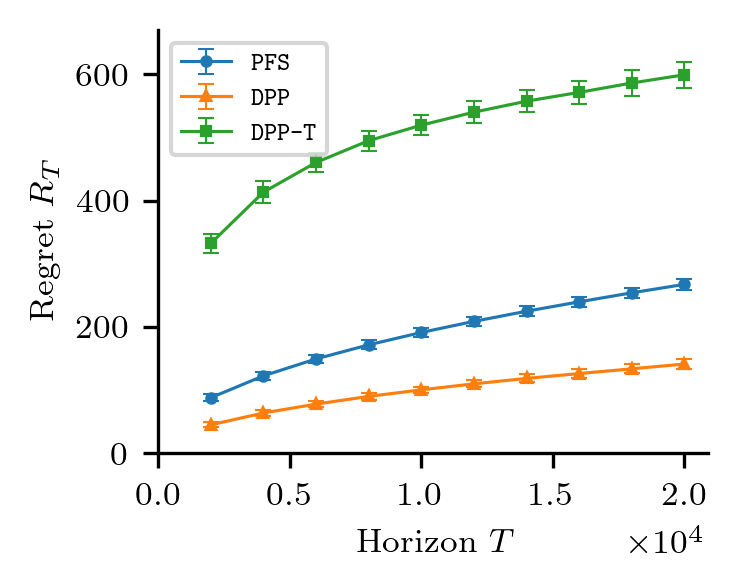

In [168]:
# regret plots
tsteps = np.load('tsteps_reg.npy')
dpp_reg = np.load('dpp/reg_dpp.npy')
dppt_reg = np.load('dppt/reg_dppt.npy')
pfs_reg = np.load('pfs/reg_pfs.npy')

dpp_reg_mean = np.mean(dpp_reg,0)
dpp_reg_std = np.std(dpp_reg,0)
dppt_reg_mean = np.mean(dppt_reg,0)
dppt_reg_std = np.std(dppt_reg,0)
pfs_reg_mean = np.mean(pfs_reg,0)
pfs_reg_std = np.std(pfs_reg,0)

fig, ax = plt.subplots(figsize=(2.5,2),dpi=300)
ax.errorbar(tsteps, pfs_reg_mean, fmt='o-',yerr=pfs_reg_std, capsize=2,label=r'\texttt{PFS}', elinewidth=0.5, capthick=0.5, markersize=2)
ax.errorbar(tsteps, dpp_reg_mean, fmt='^-',yerr=dpp_reg_std, capsize=2,label=r'\texttt{DPP}', elinewidth=0.5, capthick=0.5, markersize=2)
ax.errorbar(tsteps, dppt_reg_mean, fmt='s-',yerr=dppt_reg_std, capsize=2,label=r'\texttt{DPP-T}', elinewidth=0.5, capthick=0.5, markersize=2)
ax.legend(fontsize=6, loc='upper left')
ax.set_ylim(bottom=0,top=670)
ax.set_xlim(left=0)
ax.set_ylabel('Regret $R_T$')
ax.set_xlabel('Horizon $T$')
fig.tight_layout()
fig.savefig('plot1a.pdf',transparent=True)

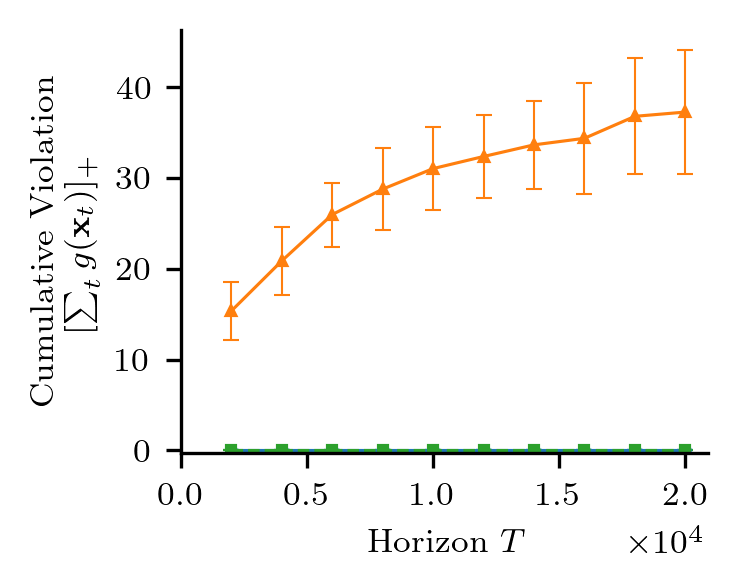

In [181]:
# violation plots
tsteps = np.load('tsteps_reg.npy')
dpp_viol = np.load('dpp/viol_dpp.npy')
dppt_viol = np.load('dppt/viol_dppt.npy')
pfs_viol = np.load('pfs/viol_pfs.npy')
zero_matrix = np.zeros(dpp_viol.shape)
dpp_trunc = np.maximum(dpp_viol,zero_matrix)
dppt_trunc = np.maximum(dppt_viol,zero_matrix)
pfs_trunc = np.maximum(pfs_viol,zero_matrix)

dpp_viol_mean = np.mean(dpp_trunc,0)
dpp_viol_std = np.std(dpp_trunc,0)
dppt_viol_mean = np.mean(dppt_trunc,0)
dppt_viol_std = np.std(dppt_trunc,0)
pfs_viol_mean = np.mean(pfs_trunc,0)
pfs_viol_std = np.std(pfs_trunc,0)

fig, ax = plt.subplots(figsize=(2.5,2),dpi=300)
ax.errorbar(tsteps, pfs_viol_mean, fmt='o-',yerr=pfs_viol_std, capsize=2,label='PFS', elinewidth=0.5, capthick=0.5, markersize=2)
ax.errorbar(tsteps, dpp_viol_mean, fmt='^-',yerr=dpp_viol_std, capsize=2,label='DPP', elinewidth=0.5, capthick=0.5, markersize=2)
ax.errorbar(tsteps, dppt_viol_mean, fmt='s--',yerr=dppt_viol_std, capsize=2,label='DPP', elinewidth=0.5, capthick=0.5, markersize=2)
# ax.legend(fontsize=6)
ax.set_ylim(bottom=-0.3)
ax.set_xlim(left=0)
ax.set_ylabel('Cumulative Violation \n $[\sum_{t} g(\mathbf{x}_t)]_+$')
ax.set_xlabel('Horizon $T$')
fig.tight_layout()
fig.savefig('plot1b.pdf',transparent=True)

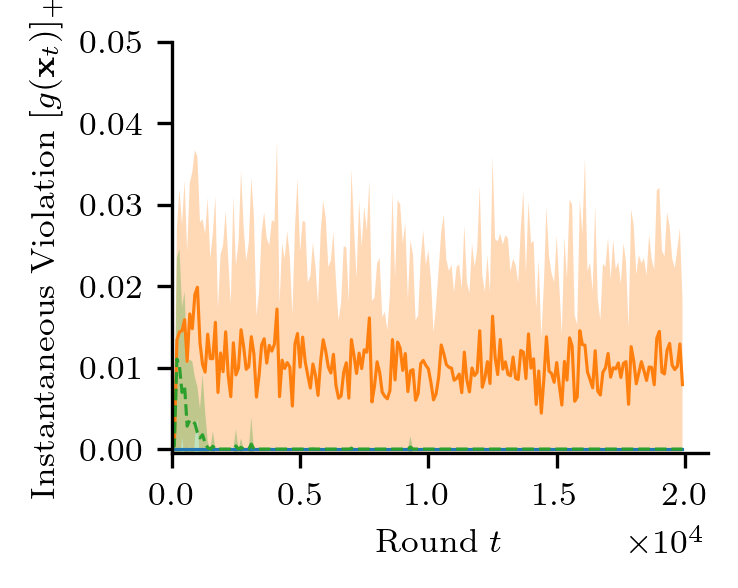

In [165]:
# instantaneous violation
tsteps = np.load('tsteps_viol.npy')
dpp_viol = np.load('dpp/sviol_dpp.npy')
pfs_viol = np.load('pfs/sviol_pfs.npy')
dpp_violt = np.load('dppt/sviol_dppt.npy')

dpp_viol_mean = np.mean(dpp_viol,1)
dpp_viol_std = np.std(dpp_viol,1)
dpp_pfs_mean = np.mean(pfs_viol,1)
dpp_pfs_std = np.std(pfs_viol,1)
dpp_violt_mean = np.mean(dpp_violt,1)
dpp_violt_std = np.std(dpp_violt,1)

fig, ax = plt.subplots(figsize=(2.5,2),dpi=300)
ax.plot(tsteps,dpp_pfs_mean, label='PFS')
ax.fill_between(tsteps,dpp_pfs_mean-dpp_pfs_std, dpp_pfs_mean+dpp_pfs_std,alpha =0.3)
ax.plot(tsteps,dpp_viol_mean, label='DPP')
ax.fill_between(tsteps,dpp_viol_mean-dpp_viol_std, dpp_viol_mean+dpp_viol_std,alpha =0.3)
ax.plot(tsteps,dpp_violt_mean,'--' ,label='DPP')
ax.fill_between(tsteps,dpp_violt_mean-dpp_violt_std, dpp_violt_mean+dpp_violt_std,alpha =0.3)
ax.set_ylim(bottom=-0.0005,top=0.05)
ax.set_xlim(left=0)
ax.set_ylabel('Instantaneous Violation $[g(\mathbf{x}_t)]_+$')
ax.set_xlabel('Round $t$')
fig.tight_layout()
fig.savefig('plot1c.pdf',transparent=True)

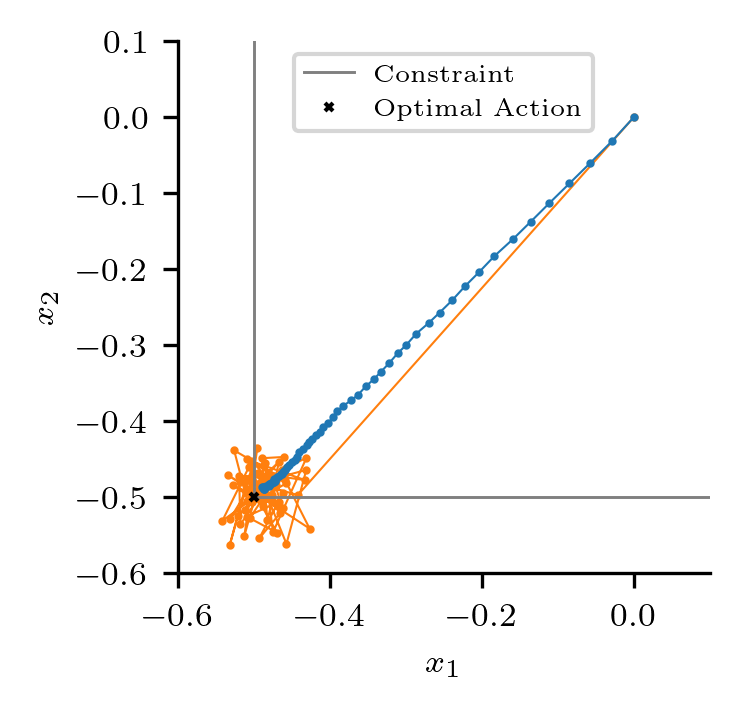

In [204]:
# plot of actions
dpp_act = np.load('dpp/act_dpp.npy')
pfs_act = np.load('pfs/act_pfs.npy')
dppt_act = np.load('dppt/act_dppt.npy')

fig, ax = plt.subplots(figsize=(2.5,2.5),dpi=300)
ax.plot(dpp_act[::300,0],dpp_act[::300,1], '.-', markersize=2, linewidth=0.5, color='tab:orange')
ax.plot(pfs_act[::300,0],pfs_act[::300,1], '.-', markersize=2, linewidth=0.5,color='tab:blue')
ax.plot([-0.5,-0.5,0.5,0.5,-0.5],[-0.5,0.5,0.5,-0.5,-0.5],'-', color='gray', linewidth=0.7,label='Constraint')
# ax.plot(0,0,'k.', markersize=2,label='Initial Action')
ax.plot(-0.5,-0.5,'kx', markersize=2,label='Optimal Action')
# ax.set_ylim(bottom=-0.002,top=0.05)
# ax.set_xlim(left=0)
ax.set_xlim([-0.6, 0.1])
ax.set_ylim([-0.6, 0.1])
ax.legend(fontsize=6)#, loc='upper left')
# ax.axis('off')
ax.set_ylabel('$x_2$')
ax.set_xlabel('$x_1$')
ax.set_aspect(1)
fig.tight_layout()
fig.savefig('plot2.pdf',transparent=True)